# NETFLIX DATA DRIVEN PRODUCT RECCOMENDATION





### The Business Case

Enhancing Customer Retention through Data Analysis

Netflix, a leading video streaming platform, has achieved commendable customer retention rates through its robust customer analysis efforts.

However, the journey to this success has been complex and multifaceted, involving collecting and analyzing vast amounts of customer data.

### The Problem

Understanding customer preferences, behaviors, and satisfaction levels is a significant challenge. Netflix aims to enhance customer satisfaction and loyalty by customizing its services to meet customer needs and expectations better.

This involves using predictive models to identify areas for improvement, refine content recommendations, enhance the user experience, and ultimately increase customer satisfaction and loyalty.

Data Collection and Analysis

Netflix collects a wide range of data, including basic customer information (age, gender, nationality), customer interactions within the application or website (devices used, viewing duration, content preferences), and all user actions on the platform.

This data is the foundation for analyzing targets such as customer satisfaction, preferences, and the likelihood of subscription renewal.

Results and Controversies


While Netflix has achieved its objectives, with rising customer retention rates and a substantial number of customers following the recommendation algorithms, its data collection has raised ethical and legal questions.

Despite informing customers of user agreements and privacy policies, the reality is that few people read these lengthy and complex documents.

This raises concerns about the transparency and ethics of data collection practices.

### The Opportunity

Despite these challenges, data analysis has immense potential for enhancing customer retention. With a customer retention rate of 93% and a churn rate of around 2.4%, Netflix's data-driven approach has proven to be highly effective.

However, there is always room for improvement and innovation, particularly in addressing data collection's ethical and legal implications.

### The Objective

Investing in this project would involve funding to enhance the data analysis capabilities further while addressing ethical and legal concerns.

This could involve developing more transparent data collection practices, investing in advanced data analysis tools, and implementing measures to ensure the ethical use of data. The potential return on investment is significant, given the proven effectiveness of data-driven customer retention strategies.

In conclusion, this project presents a unique opportunity to leverage data analysis to enhance customer retention while addressing data colction's ethical and legal implications.


## Product reccomendation solution
The chosen subject is a data-driven product recommendation solution among the many solutions because it has several advantages over the customer segmentation and profiling solution and other possible solutions.

First, the data-driven product recommendation solution can leverage the internal data sources that the company already has, such as customer purchase history, browsing behavior, ratings, reviews, and preferences. This means that the company does not need to rely on external data sources that may be costly, unreliable, or outdated.

Second, the data-driven product recommendation solution can provide more personalized and relevant suggestions to each customer based on their unique needs and interests. This can increase customer satisfaction, loyalty, and retention and boost sales and revenue.

Third, the data-driven product recommendation solution can adapt to changing customer behavior and preferences using machine learning algorithms that can learn from new data and feedback. This can ensure that the recommendations are always up-to-date and accurate and uncover new patterns and opportunities for the company.

## Implementation

The task is to personalize movie recommendation approach, we are employing four different modeling approaches: information-based models and neural networks; Random Forest Classifier, Multi-layer Perceptron, Keras Neural Network, and Descion Tree Classifier. By vectorizing movie descriptions using TF-IDF and applying these advanced modeling techniques, we not only enhance our recommendation system's accuracy but also ensure compliance with legal obligations regarding customer privacy and ethical considerations. This approach allows us to dynamically suggest movies based on individual preferences while safeguarding customer information.
s:

These models leverage decision trees or rule-based systems to segment data according to various criteria, including entropy, information gain, or the Gini index.
They excel in identifying pivotal features and variables that influence customer preferences, facilitating the generation of specific rules or paths for diverse product recommendations.
The clear, logical structure of information-based models enhances their interpretability and ease of explanation, making them highly adaptable and scalable to various data types and new data sources.
Neural Networks:on systems.

To set up the environment for these modeling approaches, we are going to perform the following steps:

- Import the relevant libraries and packages, such as pandas, numpy, scikit-learn, tensorflow, keras, etc.

- Load and preprocess the data, such as removing missing values, outliers, duplicates, etc.

- Perform exploratory data analysis, such as visualizing the data, calculating summary statistics, identifying correlations, etc.

- Split the data into training, validation, and testing sets and apply feature engineering, scaling, encoding,models. optimizers, loss functions, etc.

- Evaluate and compare the performance of the models, such as using accuracy, precision, recall, F1-score, etc., and select the best model based on the results.

- We would then be able to deploy and monitor the model, such as using Flask, Docker, Kubernetes, etc., and collect feedback and metrics, such as click-through rate, conversion rate, etc.


### Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
!pip install pandas_profiling
!pip install pydantic-settings
!pip install bump-pydantic
!pip install -U pydantic
!pip install AutoViz
!pip install hdbscan
!pip install --upgrade tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, hamming_loss
from sklearn.inspection import permutation_importance
from hdbscan import HDBSCAN
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)



### Predefined Methods

In [4]:
def to_pascal_case(s):
    return ''.join(word.title() for word in s.split('_'))

In [5]:
def get_metrics(Y_test, Y_pred):
    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred, average='samples')
    precision = precision_score(Y_test, Y_pred, average='samples')
    f1 = f1_score(Y_test, Y_pred, average='samples')
    hamming = hamming_loss(Y_test, Y_pred)
    return {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1-Score': f1, 'Hamming Loss': hamming}

In [6]:
def calculate_metrics(Y_test, Y_pred):
    Y_test_flat = Y_test.ravel()
    Y_pred_flat = Y_pred.ravel()
    
    accuracy = accuracy_score(Y_test_flat, Y_pred_flat)
    recall = recall_score(Y_test_flat, Y_pred_flat)
    precision = precision_score(Y_test_flat, Y_pred_flat)
    f1 = f1_score(Y_test_flat, Y_pred_flat)
    hamming = hamming_loss(Y_test_flat, Y_pred_flat)
    return {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1-Score': f1, 'Hamming Loss': hamming}

### Import Dataset

In [7]:
df = pd.read_csv('netflix_titles.csv')

### Preprocess the data 

Shape of your Data Set loaded: (8807, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  5
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['show_id']
To fix these data quality issues in the dataset, import 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
show_id,object,0.000000,100,,,Possible ID column: drop before modeling step.
type,object,0.000000,0,,,No issue
title,object,0.000000,100,,,No issue
director,object,29.908028,51,,,"2634 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
cast,object,9.367549,87,,,"825 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,"
country,object,9.435676,8,,,"831 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 748 unique values: Use hash encoding or text embedding to reduce dimension."
date_added,object,0.113546,20,,,"10 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
release_year,int64,0.000000,0,1925.000000,2021.000000,Possible date-time colum: transform before modeling step.
rating,object,0.045418,0,,,"4 missing values. Impute them with mean, median, mode, or a constant value such as 123., 8 rare categories: ['NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
duration,object,0.034064,2,,,"3 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 220 unique values: Use hash encoding or text embedding to reduce dimension."


Could not draw Distribution Plot


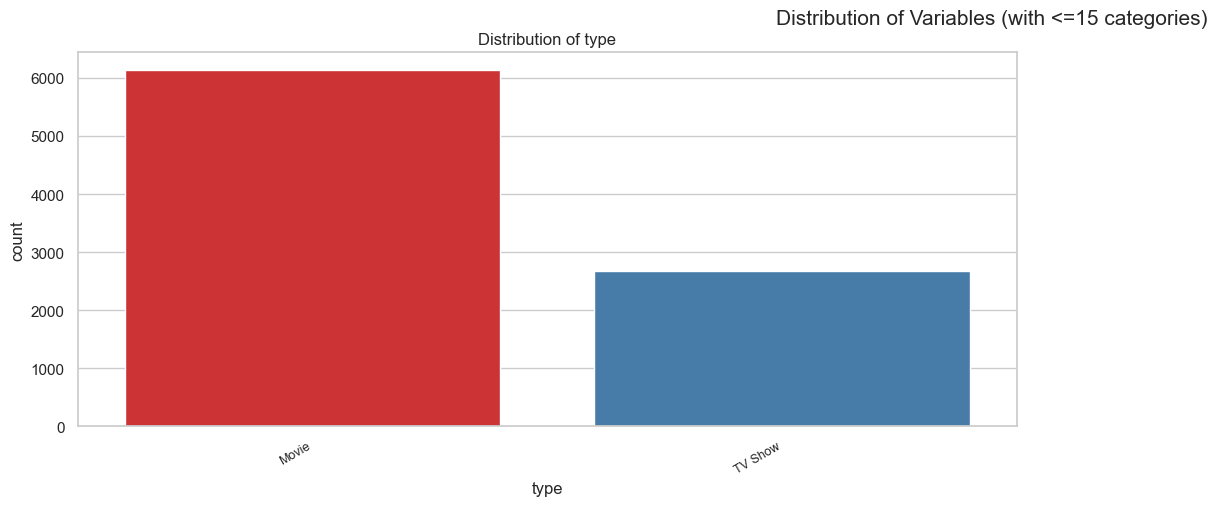

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\jyf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\jyf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\jyf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\jyf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\jyf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\

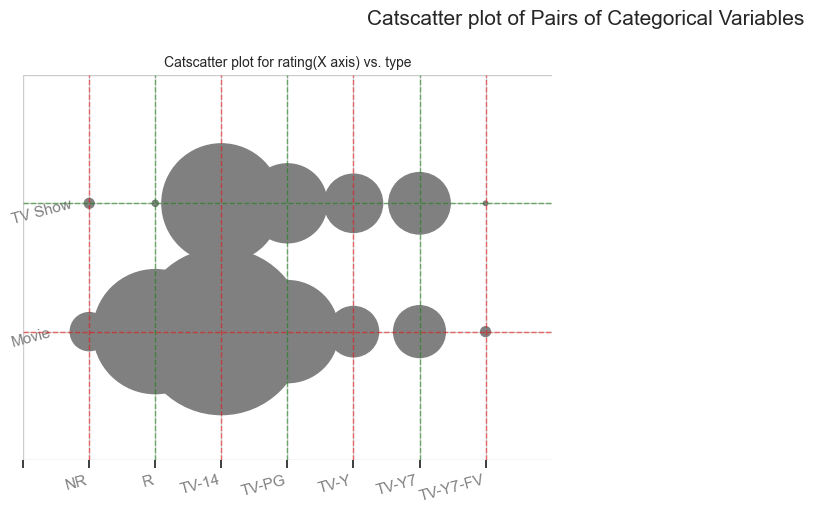

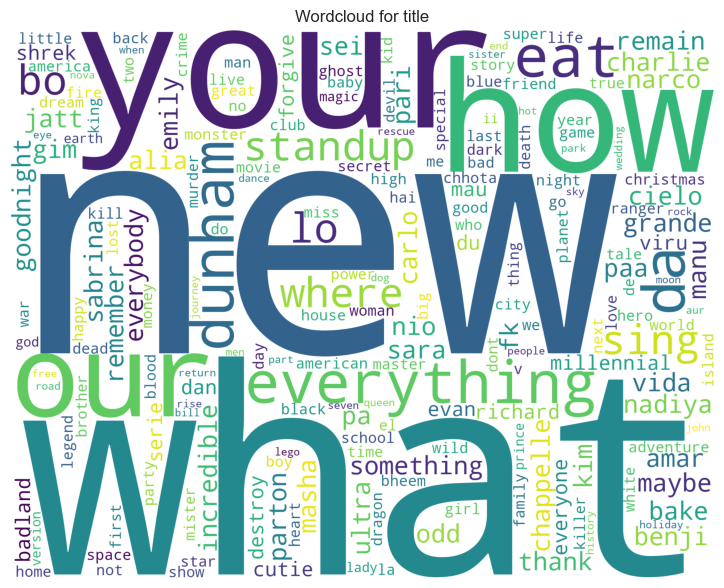

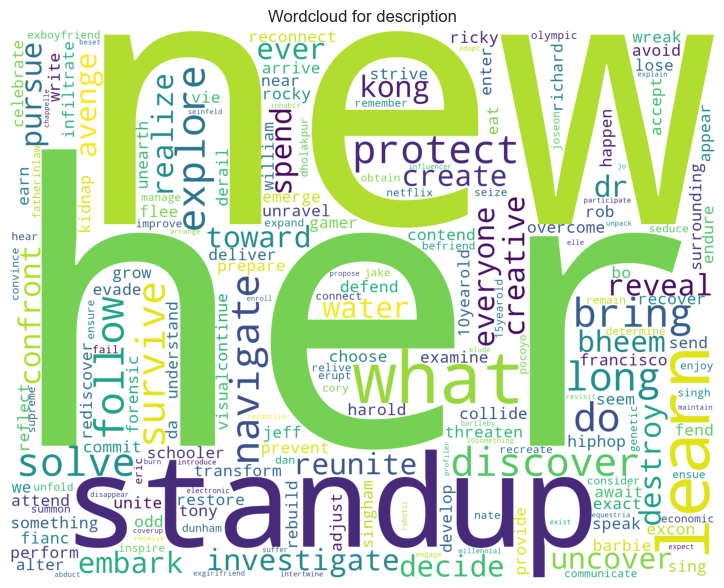

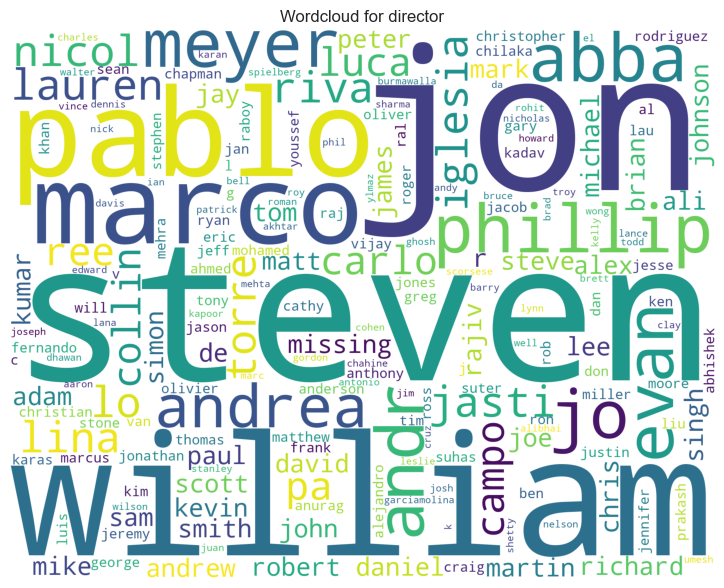

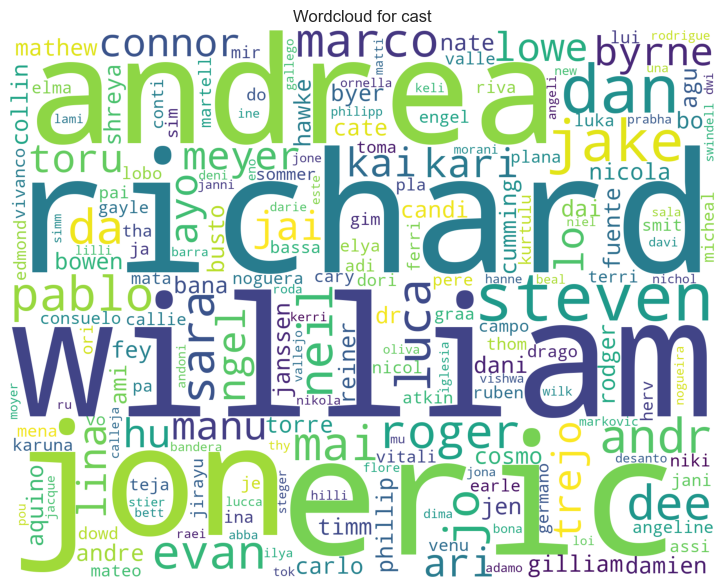

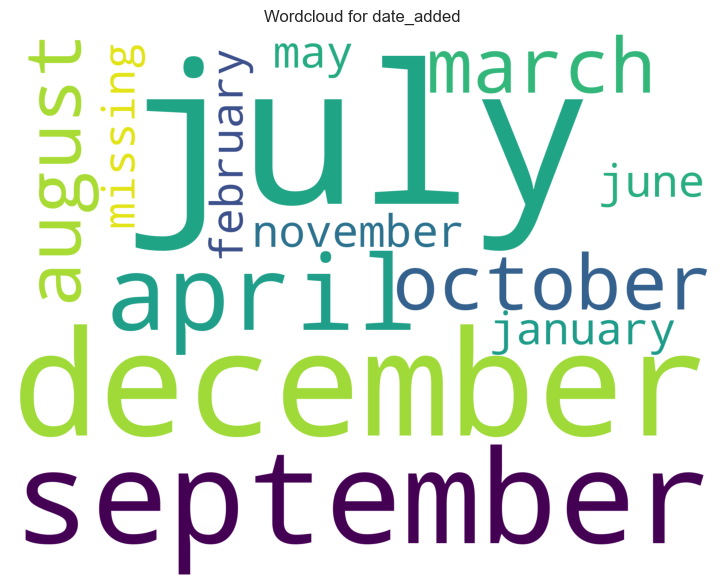

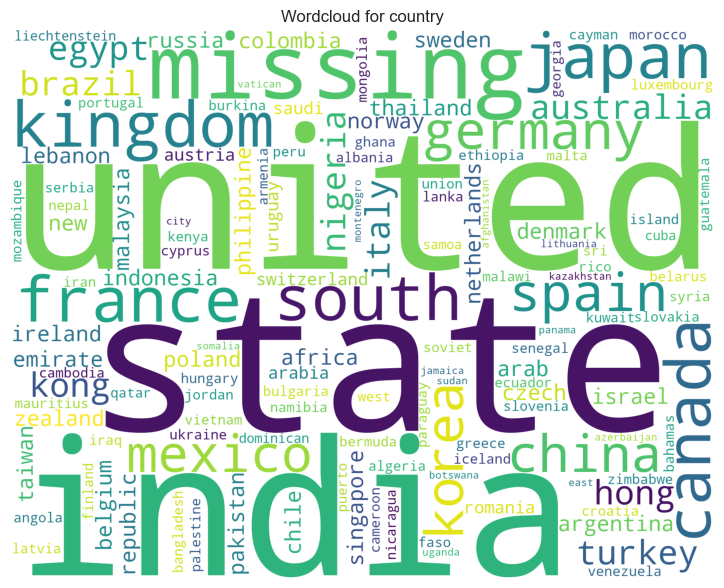

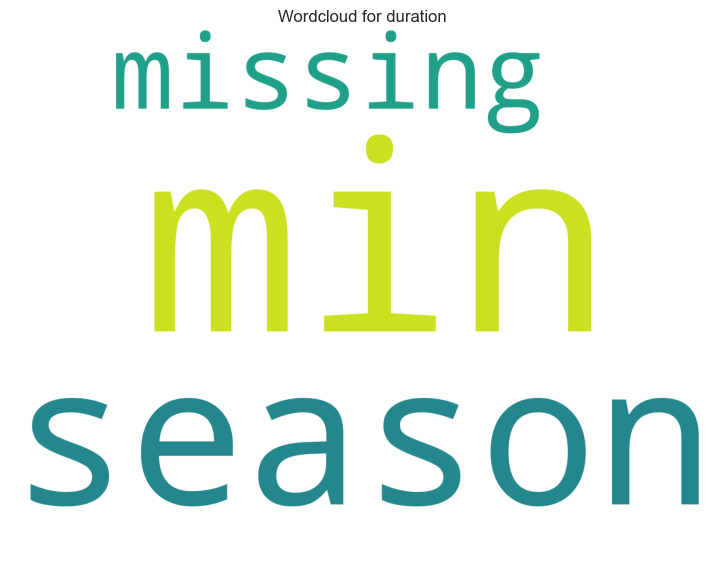

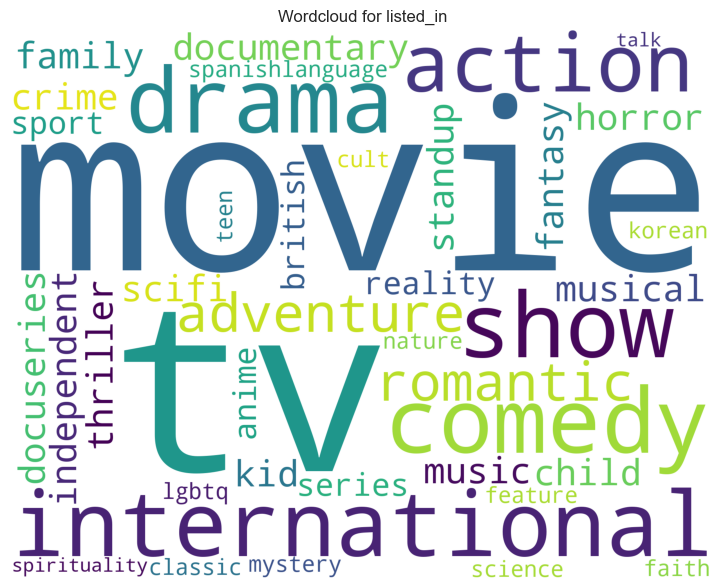

All Plots done
Time to run AutoViz = 31 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [8]:
autoviz = AutoViz_Class().AutoViz('netflix_titles.csv')

In [9]:
df.columns = [to_pascal_case(column) for column in df.columns]

In [10]:
df = df.drop_duplicates()

In [11]:
df['TypeCode'] = df['Type'].apply(lambda x: 1 if x == 'Movie' else 0)

In [12]:
unique_ratings = df['Rating'].unique()
rating_to_code = {rating: code for code, rating in enumerate(unique_ratings)}
df['RatingCode'] = df['Rating'].map(rating_to_code)

In [13]:
df = df[df['Description'] != 'Unknown']
df = df[df['ListedIn'] != 'Unknown']
df = df.dropna(subset=['Description', 'ListedIn'])

In [14]:
df['Genres'] = df['ListedIn'].apply(lambda x: x.split(', '))

In [15]:
df.shape

(8807, 15)

In [16]:
df.head()

,ShowId,Type,Title,Director,Cast,Country,DateAdded,ReleaseYear,Rating,Duration,ListedIn,Description,TypeCode,RatingCode,Genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",1,0,[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",0,1,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",0,1,"[Crime TV Shows, International TV Shows, TV Action & Adventure]"
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",0,1,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",0,1,"[International TV Shows, Romantic TV Shows, TV Comedies]"


In [17]:
df.tail()

,ShowId,Type,Title,Director,Cast,Country,DateAdded,ReleaseYear,Rating,Duration,ListedIn,Description,TypeCode,RatingCode,Genres
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story.",1,7,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities.",0,6,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.",1,7,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.",1,2,"[Children & Family Movies, Comedies]"
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals","A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past.",1,3,"[Dramas, International Movies, Music & Musicals]"


In [18]:
main_df = df.copy()

In [19]:
df.isnull().sum()

ShowId            0
Type              0
Title             0
Director       2634
Cast            825
Country         831
DateAdded        10
ReleaseYear       0
Rating            4
Duration          3
ListedIn          0
Description       0
TypeCode          0
RatingCode        0
Genres            0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ShowId       8807 non-null   object
 1   Type         8807 non-null   object
 2   Title        8807 non-null   object
 3   Director     6173 non-null   object
 4   Cast         7982 non-null   object
 5   Country      7976 non-null   object
 6   DateAdded    8797 non-null   object
 7   ReleaseYear  8807 non-null   int64 
 8   Rating       8803 non-null   object
 9   Duration     8804 non-null   object
 10  ListedIn     8807 non-null   object
 11  Description  8807 non-null   object
 12  TypeCode     8807 non-null   int64 
 13  RatingCode   8807 non-null   int64 
 14  Genres       8807 non-null   object
dtypes: int64(3), object(12)
memory usage: 1.1+ MB


In [21]:
df.describe()

,ReleaseYear,TypeCode,RatingCode
count,8807.000000,8807.000000,8807.000000
mean,2014.180198,0.696151,2.993869
std,8.819312,0.459944,2.490766
min,1925.000000,0.000000,0.000000
25%,2013.000000,0.000000,1.000000
50%,2017.000000,1.000000,3.000000
75%,2019.000000,1.000000,4.000000
max,2021.000000,1.000000,17.000000


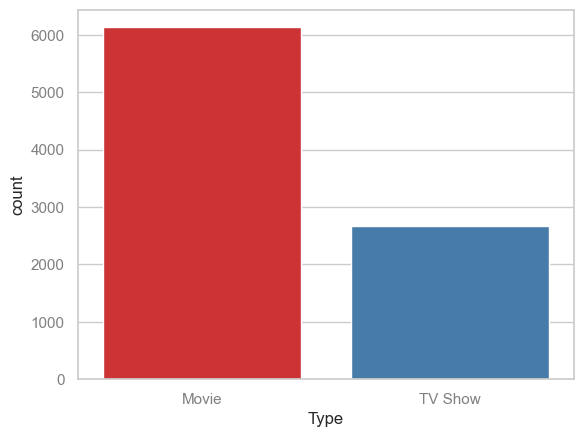

In [22]:
sns.countplot(data=df, x='Type')
plt.show()

### Training Data

In [23]:
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['Genres'])

In [24]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Description'])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Random Forest Classifier

In [26]:
rfc = MultiOutputClassifier(RandomForestClassifier(random_state=42))

In [27]:
rfc.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [28]:
rfc_pred = rfc.predict(X_test)

### MLP Classifier

In [29]:
mlp = MultiOutputClassifier(MLPClassifier(max_iter=300, random_state=42))

In [30]:
mlp.fit(X_train, Y_train)

MultiOutputClassifier(estimator=MLPClassifier(max_iter=300, random_state=42))

In [31]:
mlp_pred = mlp.predict(X_test)

### Decision Tree Classifier

In [32]:
dtc = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))

In [33]:
dtc.fit(X_train, Y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [34]:
dtc_pred = dtc.predict(X_test)

### Keras Neural Network

In [35]:
model = Sequential()

In [36]:
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

In [37]:
model.add(Dense(units=Y_train.shape[1], activation='sigmoid'))

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
X_train_dense = X_train.toarray() if 'toarray' in dir(X_train) else X_train
Y_train_dense = Y_train.toarray() if 'toarray' in dir(Y_train) else Y_train
model.fit(X_train_dense, Y_train_dense, epochs=10, batch_size=32)

Epoch 1/10


193/193 [==============================] - 1s 1ms/step - loss: 0.3646 - accuracy: 0.0224
Epoch 2/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.0242
Epoch 3/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1660 - accuracy: 0.0511
Epoch 4/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1577 - accuracy: 0.1293
Epoch 5/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1500 - accuracy: 0.2130
Epoch 6/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.2805
Epoch 7/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.3128
Epoch 8/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.3465
Epoch 9/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.3722
Epoch 10/10
193/193 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.39

In [40]:
loss, accuracy = model.evaluate(X_train_dense, Y_train_dense, verbose=0)

In [41]:
X_train_dense = X_test.toarray() if 'toarray' in dir(X_test) else X_test
Y_pred_prob = model.predict(X_train_dense)

83/83 [==============================] - 0s 855us/step


### Performance Comparsion

In [42]:
rfc_metrics = get_metrics(Y_test, rfc_pred)

In [43]:
mlp_metrics = get_metrics(Y_test, mlp_pred)

In [44]:
dtc_metrics = get_metrics(Y_test, dtc_pred)

In [45]:
Y_pred = (Y_pred_prob > 0.5).astype(int)

In [46]:
metrics = calculate_metrics(Y_test, Y_pred)

In [47]:
print(f"Random Forest Metrics: {rfc_metrics}")

Random Forest Metrics: {'Accuracy': 0.05978055240257284, 'Recall': 0.1424517593643587, 'Precision': 0.21906923950056753, 'F1-Score': 0.1631227140875268, 'Hamming Loss': 0.04986216961245338}


In [48]:
print(f"Neural Network Metrics: {mlp_metrics}")

Neural Network Metrics: {'Accuracy': 0.08777903897086645, 'Recall': 0.3168747635262959, 'Precision': 0.35853348631441706, 'F1-Score': 0.312009315357783, 'Hamming Loss': 0.059231032556798735}


In [49]:
print(f"Decision Tree Metrics: {dtc_metrics}")

Decision Tree Metrics: {'Accuracy': 0.049943246311010214, 'Recall': 0.262454281750536, 'Precision': 0.2716042376087779, 'F1-Score': 0.24551285516098229, 'Hamming Loss': 0.069023296038052}


In [50]:
print(f"Keras Neural Network Metrics: {metrics}")

Keras Neural Network Metrics: {'Accuracy': 0.9507864439760013, 'Recall': 0.1777009507346586, 'Precision': 0.5928489042675894, 'F1-Score': 0.2734406171033382, 'Hamming Loss': 0.049213556023998704}


### Visualization and Clustering

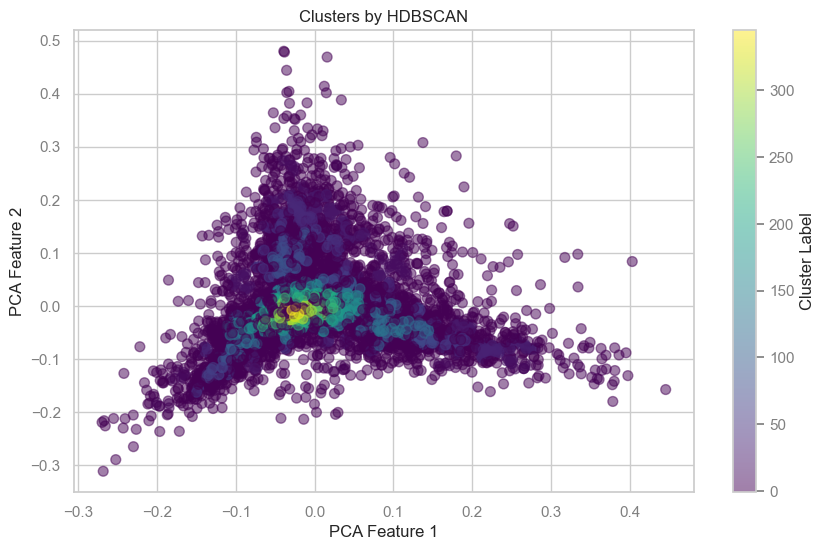

In [51]:
X_dense = X.toarray()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

hdbscan_cluster = HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusters = hdbscan_cluster.fit_predict(X_pca)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.title('Clusters by HDBSCAN')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

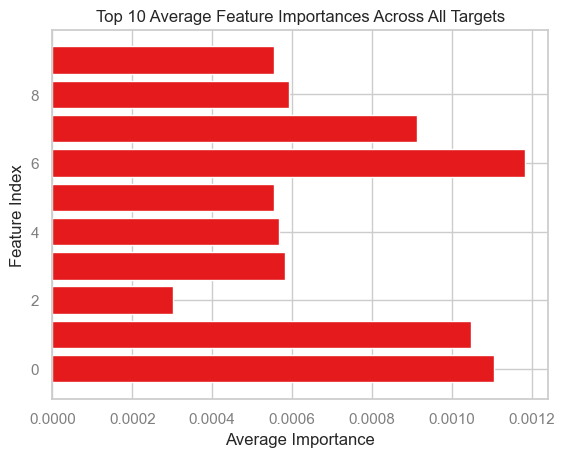

In [52]:
num_features = X.shape[1]

aggregate_feature_importances = np.zeros(num_features)

for estimator in rfc.estimators_:
    aggregate_feature_importances += estimator.feature_importances_


aggregate_feature_importances /= len(rfc.estimators_)

feature_indices = np.arange(num_features)

plt.barh(feature_indices[:10], aggregate_feature_importances[:10])  
plt.xlabel('Average Importance')
plt.ylabel('Feature Index')
plt.title('Top 10 Average Feature Importances Across All Targets')
plt.show()